In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
# включим для графиков LaTeX и добавим русский
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage[utf8]{inputenc}')
rc('text.latex', preamble='\\usepackage[russian]{babel}')

In [2]:
data = pd.read_csv("data_11.1.csv")
data.columns

Index(['U', 'R_cu', 'R_sc', 'T', 'σ_cu', 'σ_sc'], dtype='object')

In [8]:
print(data.iloc[1:4, 1:3].to_latex())

\begin{tabular}{lrr}
\toprule
{} &    R\_cu &    R\_sc \\
\midrule
1 &  0.1859 &  0.2572 \\
2 &  0.1879 &  0.2439 \\
3 &  0.1894 &  0.2305 \\
\bottomrule
\end{tabular}



In [229]:
l = 13.4;
l2 = 39e-3;
d = 0.07e-3;
S = np.pi * d**2 / 4;
S2 = 4e-3 * 4e-3;
GetSigma = lambda R: l / R / S / 1000;
GetSigma2 = lambda R: l2 / R / S2 / 1000;

In [230]:
err_R = 0.0005;

In [231]:
data["sigma_cu"] = data["R_cu"].map(GetSigma)
data["sigma_sc"] = data["R_sc"].map(GetSigma2)
data.head()

,U,R_cu,R_sc,T,σ_cu,σ_sc,σ_cu_v2,sigma_cu,sigma_sc
0,0.4,0.1831,0.2772,304.484211,1.901650e+10,1.256104e+10,1.901650e+10,1.901650e+07,8.793290
1,0.6,0.1859,0.2572,309.115789,1.873007e+10,1.353779e+10,1.873007e+10,1.873007e+07,9.477061
2,0.7,0.1879,0.2439,311.431579,1.853071e+10,1.427602e+10,1.853071e+10,1.853071e+07,9.993850
3,0.8,0.1894,0.2305,313.747368,1.838395e+10,1.510595e+10,1.838395e+10,1.838395e+07,10.574837
4,0.9,0.1910,0.2153,316.063158,1.822995e+10,1.617241e+10,1.822995e+10,1.822995e+07,11.321412


In [232]:
sigma_cu_0 = data["sigma_cu"][0]
sigma_sc_0 = data["sigma_sc"][0]

In [233]:
ss = 4.5;

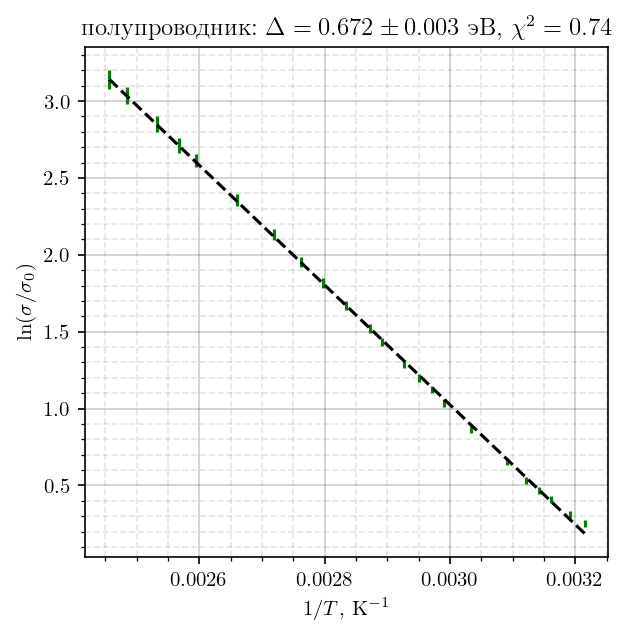

In [241]:
x = 1 / (data["T"]-5)
y = np.log(data["sigma_sc"]/sigma_sc_0)
xerr = 0
yerr = (err_R + 0.02 * data["R_sc"])/data["R_sc"]


start = 4;
end   = None;
[a, b], cov = np.polyfit(x[start:end], y[start:end], 1, cov=True)

chi2 = np.sum((y[start:end] - a * x[start:end] - b)**2/yerr[start:end]**2)/(x.shape[0]-start-2);
kB = 1.38e-23;
Delta = -2 * kB * a / 1.6e-19;
err_Delta = 2 * kB * cov[0][0]**0.5/ 1.6e-19
                  
fig, ax = plt.subplots(dpi=150, figsize=(ss, ss))
# plt.scatter(x[start:end], y[start:end], color="g", s=5)
plt.errorbar(x[start:end], y[start:end], color="g", fmt=",",
             xerr=0, 
             yerr=yerr[start:end])
plt.plot(x[start:end], a * x[start:end] + b, "--k")
plt.title("полупроводник: $\\Delta = {:.3f} \pm {:.3f}$ эВ,      $\\chi^2 = {:.2f}$".format(Delta,err_Delta, chi2))

plt.xlabel("$1/T$, K${}^{-1}$")
plt.ylabel("$\\ln(\\sigma/\\sigma_0)$")
ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
plt.savefig("plot_sc_6.11.1.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

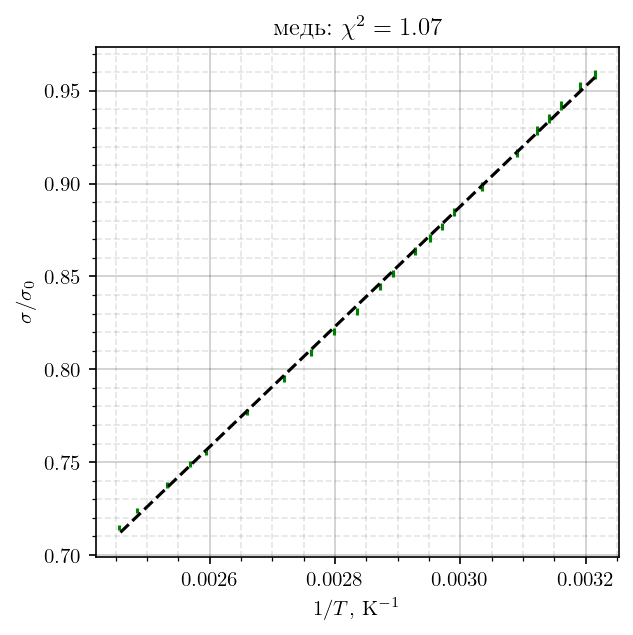

In [246]:
x = 1 / (data["T"]-5)
y = data["sigma_cu"]/sigma_cu_0
xerr = 0
yerr = (0.0005 + 0.000 * data["R_cu"])/data["R_cu"] * data["sigma_cu"]/sigma_cu_0


start = 4;
end   = None;
[a, b], cov = np.polyfit(x[start:end], y[start:end], 1, cov=True)

chi2 = np.sum((y[start:end] - a * x[start:end] - b)**2/yerr[start:end]**2)/(x.shape[0]-start-2);
kB = 1.38e-23;
Delta = -2 * kB * a / 1.6e-19;
err_Delta = 2 * kB * cov[0][0]**0.5/ 1.6e-19
                  
fig, ax = plt.subplots(dpi=150, figsize=(ss, ss))
# plt.scatter(x[start:end], y[start:end], color="g", s=5)
plt.errorbar(x[start:end], y[start:end], color="g", fmt=",",
             xerr=0, 
             yerr=yerr[start:end])
plt.plot(x[start:end], a * x[start:end] + b, "--k")
plt.title("медь: $\\chi^2 = {:.2f}$".format(chi2))

plt.xlabel("$1/T$, K${}^{-1}$")
plt.ylabel("$\\sigma/\\sigma_0$")
ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
plt.savefig("plot_cu_6.11.1.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

In [240]:
a

323.7225052009046

In [247]:
cov[0][0]**0.5

1.6375238239105823

In [243]:
cov[1][1]**0.5

0.0527873195431608

In [244]:
a

-3895.5140644689923

In [245]:
b

12.711279755357213

In [238]:
data2 = data[["U", "T", "R_cu", "R_sc", "sigma_cu", "sigma_sc"]].copy()
data2["T"] = np.round(data2["T"]-5, 1)
data2["R_cu"] = np.round(data2["R_cu"], 3)
data2["R_sc"] = np.round(data2["R_sc"], 3)
data2["sigma_cu"] = np.round(data2["sigma_cu"]/1e7, 2)
data2["err_sigma_cu"] = np.round((err_R + 0.02 * data["R_cu"]) / data2["R_cu"] * data2["sigma_cu"], 2)
data2["sigma_sc"] = np.round(data2["sigma_sc"]/1e1, 2)
data2["err_sigma_sc"] = np.round((err_R + 0.02 * data["R_sc"]) / data2["R_sc"] * data2["sigma_sc"], 2)
data2

,U,T,R_cu,R_sc,sigma_cu,sigma_sc,err_sigma_cu,err_sigma_sc
0,0.40,299.5,0.183,0.277,1.90,0.88,0.04,0.02
1,0.60,304.1,0.186,0.257,1.87,0.95,0.04,0.02
2,0.70,306.4,0.188,0.244,1.85,1.00,0.04,0.02
3,0.80,308.7,0.189,0.230,1.84,1.06,0.04,0.02
4,0.90,311.1,0.191,0.215,1.82,1.13,0.04,0.03
5,1.00,313.4,0.192,0.204,1.81,1.20,0.04,0.03
6,1.13,316.4,0.194,0.184,1.79,1.32,0.04,0.03
7,1.21,318.2,0.196,0.174,1.78,1.40,0.04,0.03
8,1.30,320.3,0.197,0.163,1.77,1.49,0.04,0.03
9,1.44,323.6,0.200,0.144,1.74,1.69,0.04,0.04


In [194]:
print(data2.to_latex(index = False))

\begin{tabular}{rrrrrrrr}
\toprule
   U &     T &  R\_cu &  R\_sc &  sigma\_cu &  sigma\_sc &  err\_sigma\_cu &  err\_sigma\_sc \\
\midrule
0.40 & 304.5 & 0.183 & 0.277 &      1.90 &      0.88 &          0.04 &          0.02 \\
0.60 & 309.1 & 0.186 & 0.257 &      1.87 &      0.95 &          0.04 &          0.02 \\
0.70 & 311.4 & 0.188 & 0.244 &      1.85 &      1.00 &          0.04 &          0.02 \\
0.80 & 313.7 & 0.189 & 0.230 &      1.84 &      1.06 &          0.04 &          0.02 \\
0.90 & 316.1 & 0.191 & 0.215 &      1.82 &      1.13 &          0.04 &          0.03 \\
1.00 & 318.4 & 0.192 & 0.204 &      1.81 &      1.20 &          0.04 &          0.03 \\
1.13 & 321.4 & 0.194 & 0.184 &      1.79 &      1.32 &          0.04 &          0.03 \\
1.21 & 323.2 & 0.196 & 0.174 &      1.78 &      1.40 &          0.04 &          0.03 \\
1.30 & 325.3 & 0.197 & 0.163 &      1.77 &      1.49 &          0.04 &          0.03 \\
1.44 & 328.6 & 0.200 & 0.144 &      1.74 &      1.69 &          0.04